# Plot Breakdown of CASA and PL Timings

The goal here is to plot the breakdown of the PL timings into individual CASA tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
import pandas as pd
import pickle
from importlib import reload
import parse_logs
import wsu_db

## read in data files

In [2]:
wsu_cycle7 = Table.read('data/wsu_datarates_mit_per_mous_cycle7_20230128.ecsv')
wsu_cycle8 = Table.read('data/wsu_datarates_mit_per_mous_cycle8_20230128.ecsv')

In [3]:
wsu_cycle7.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_time','phase_time','pol_time','check_tim

In [16]:
wsu_all = vstack([wsu_cycle7,wsu_cycle8])

In [5]:
reload(parse_logs)

<module 'parse_logs' from '/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/parse_logs.py'>

In [6]:
casa_cycle7 = parse_logs.convert_to_astropy('data/cycle7_pl_casa_timings_20230124.pkl',
                                           dump_rows=['uid://A001/X1465/X3d1e','uid://A001/X1465/X3102','uid://A001/X1477/X41'])

In [7]:
casa_cycle7.columns

<TableColumns names=('mous','casaversion','pipeStartTime','recipe','casatasks','importasdm','flagdata','listobs','plotms','clearstat','flagcmd','gencal','plotbandpass','wvrgcal','gaincal','bandpass','setjy','flagmanager','applycal','plotms_mpi','fluxscale','casatools','imager.selectvis','imager.advise','imager.apparentsens','tclean_mpi','tclean','pipeEndTime','exportfits','mstransform','imhead','immoments','imstat','imsubimage','makemask','ia.getprofile','immath','uvcontfit','pipetime','visstat')>

In [8]:
reload(parse_logs)

<module 'parse_logs' from '/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/parse_logs.py'>

In [9]:
casa_cycle8 = parse_logs.convert_to_astropy('data/cycle8_pl_casa_timings_20230124.pkl',dump_rows=['uid://A001/X1590/X2da5'])

In [10]:
casa_cycle8.columns

<TableColumns names=('mous','casaversion','pipeStartTime','recipe','casatasks','importasdm','flagdata','listobs','plotms','clearstat','flagcmd','gencal','plotbandpass','gaincal','bandpass','setjy','flagmanager','applycal','plotms_mpi','fluxscale','casatools','imager.selectvis','imager.advise','imager.apparentsens','tclean_mpi','tclean','pipeEndTime','exportfits','mstransform','imhead','immoments','imstat','imsubimage','makemask','ia.getprofile','immath','uvcontfit','pipetime','wvrgcal','visstat','pipeline.hif.heuristics.imageparams_base::imager::setDataOnThisMS')>

In [11]:
casa_cycle8.remove_column('pipeline.hif.heuristics.imageparams_base::imager::setDataOnThisMS')

In [12]:
casa_db = vstack([casa_cycle7,casa_cycle8])

# Distribution of Pipeline run times

In [17]:
np.unique(wsu_all['procedure'])

--
hifa_calimage
hifa_calimage_renorm
hifa_image


In [18]:
np.unique(wsu_cycle7['procedure'])

--
hifa_calimage
hifa_calimage_renorm
hifa_image


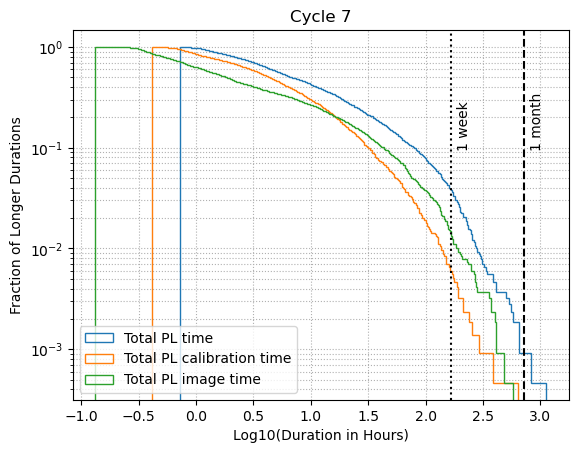

In [158]:
reload(parse_logs)
idx = (wsu_cycle7['procedure'] == 'hifa_calimage') | (wsu_cycle7['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_timedist(wsu_cycle7[idx],plot_title='Cycle 7',figname='plots_pl/pl_duration_distribution_cycle7.png')

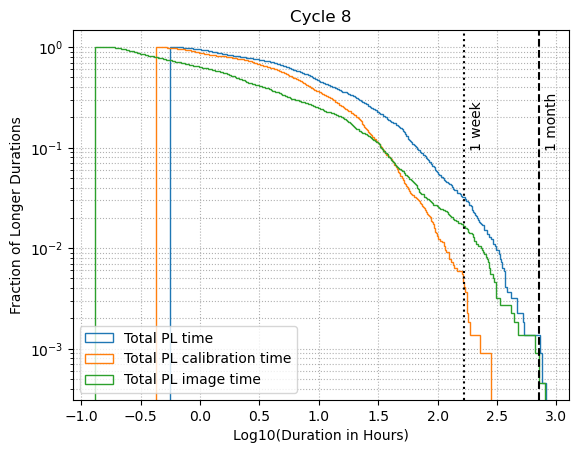

In [159]:
reload(parse_logs)
idx = (wsu_cycle8['procedure'] == 'hifa_calimage') | (wsu_cycle8['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_timedist(wsu_cycle8[idx],plot_title='Cycle 8',figname='plots_pl/pl_duration_distribution_cycle8.png')

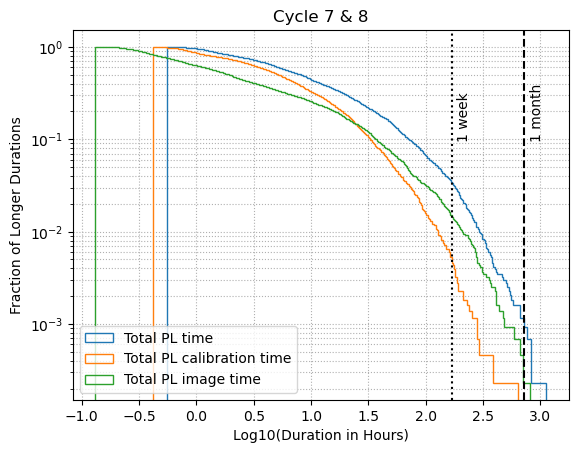

In [160]:
reload(parse_logs)
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_timedist(wsu_all[idx],plot_title='Cycle 7 & 8',figname='plots_pl/pl_duration_distribution_cycle7_cycle8.png')

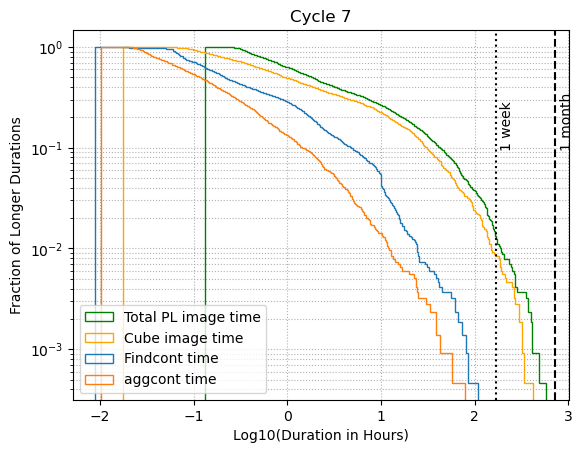

In [162]:
reload(parse_logs)
idx = (wsu_cycle7['procedure'] == 'hifa_calimage') | (wsu_cycle7['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_imgtime_breakdown(wsu_cycle7[idx],plot_title='Cycle 7',
                                  figname='plots_pl/pl_img_duration_distribution_cycle7.png')

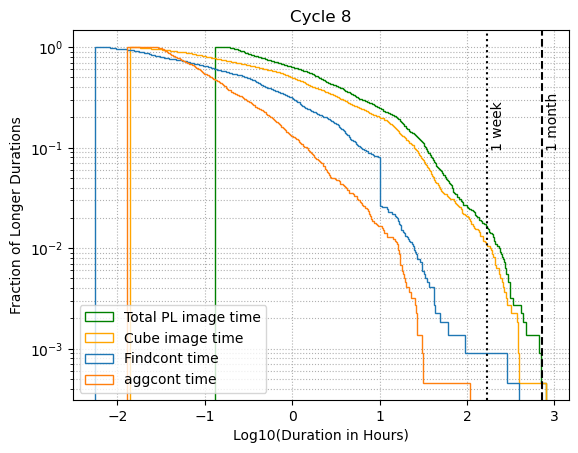

In [163]:
reload(parse_logs)
idx = (wsu_cycle8['procedure'] == 'hifa_calimage') | (wsu_cycle8['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_imgtime_breakdown(wsu_cycle8[idx],plot_title='Cycle 8',
                                  figname='plots_pl/pl_img_duration_distribution_cycle8.png')

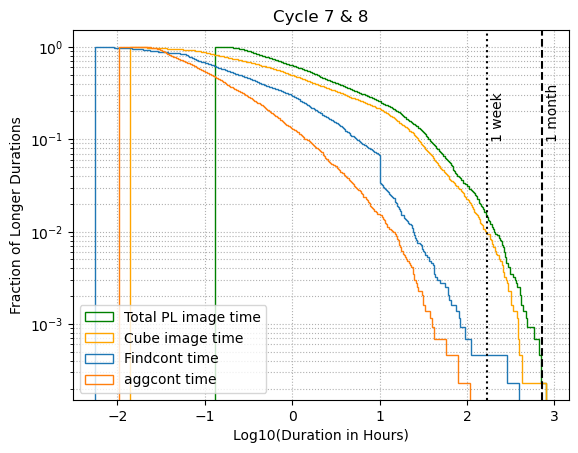

In [173]:
reload(parse_logs)
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_imgtime_breakdown(wsu_all[idx],plot_title='Cycle 7 & 8',
                                  figname='plots_pl/pl_img_duration_distribution_cycle7_cycle8.png')

I don't know where there is a big jump in the findcont time at 10 hours. The data values look okay (I think). But I need to take a deeper look. Is something wrong with the underlying cycle 8 data? Or did findcont change in some way?

## Plot Fraction of Calibration and Imaging Time

/Users/akepley/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(
/Users/akepley/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


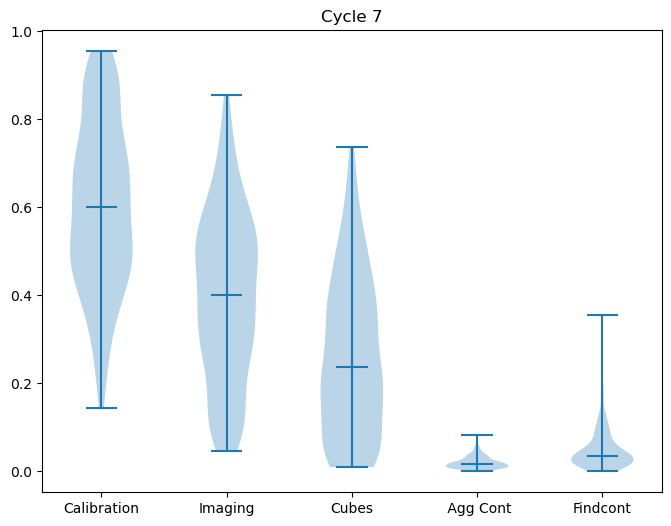

In [25]:
reload(parse_logs)
parse_logs.plot_cal_img_time(wsu_cycle7,plot_title='Cycle 7')

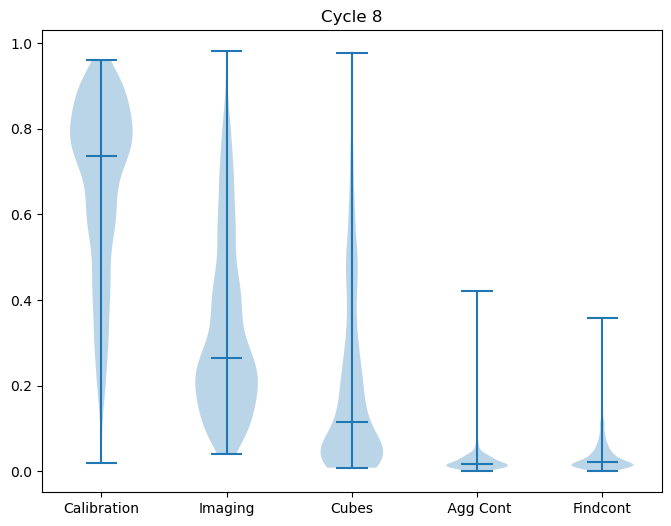

In [26]:
reload(parse_logs)
parse_logs.plot_cal_img_time(wsu_cycle8,plot_title='Cycle 8')

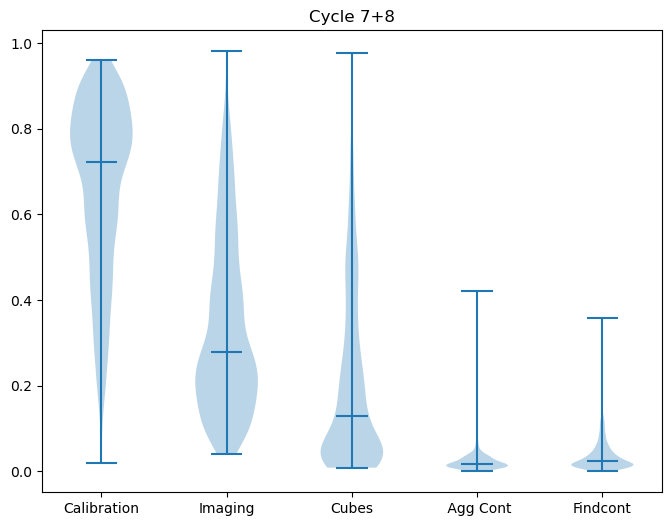

In [27]:
reload(parse_logs)
parse_logs.plot_cal_img_time(wsu_all,plot_title='Cycle 7+8')

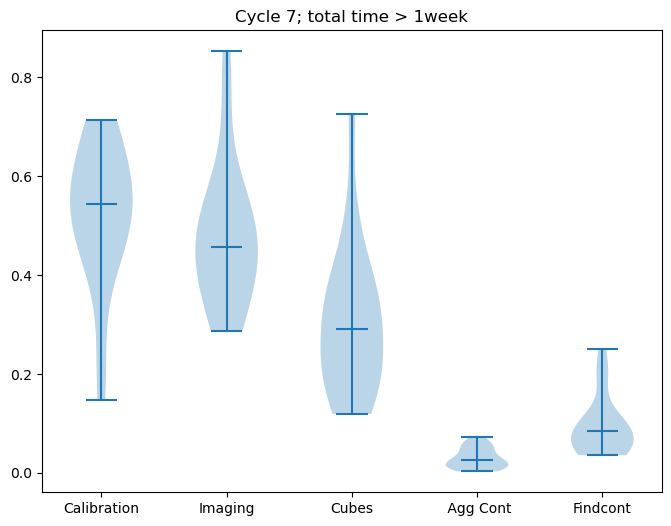

In [28]:
idx = wsu_cycle7['pl_totaltime'] > 168.
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; total time > 1week')

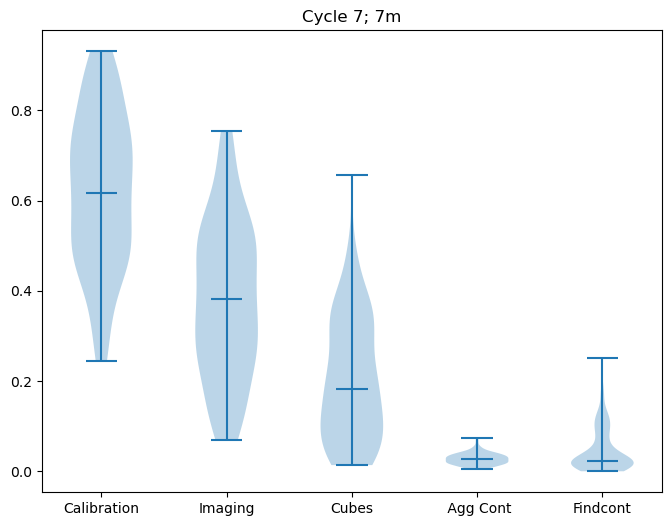

In [29]:
idx = wsu_cycle7['array'] == '7m'
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; 7m')

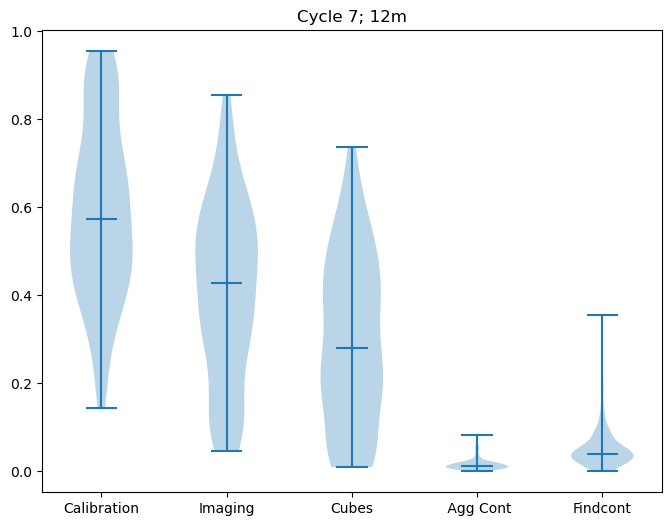

In [30]:
idx = wsu_cycle7['array'] == '12m'
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; 12m')

## Plot Fraction of CASA  time, CASA task, CASA tool

In [31]:
import parse_logs

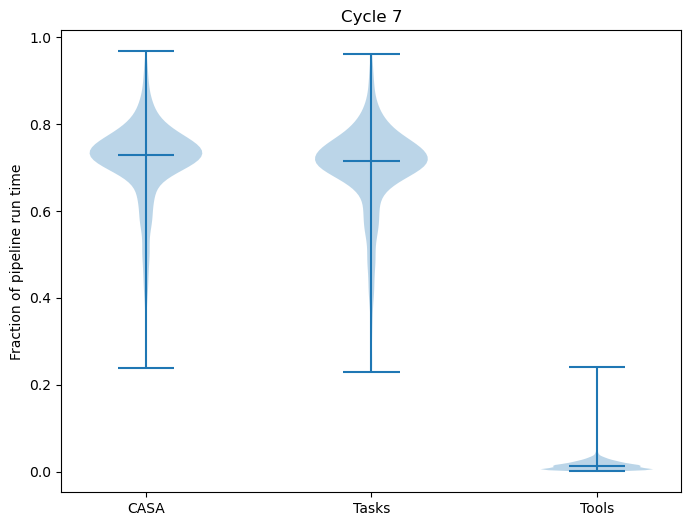

In [32]:
reload(parse_logs)
parse_logs.plot_casa_time(casa_cycle7, plot_title='Cycle 7')

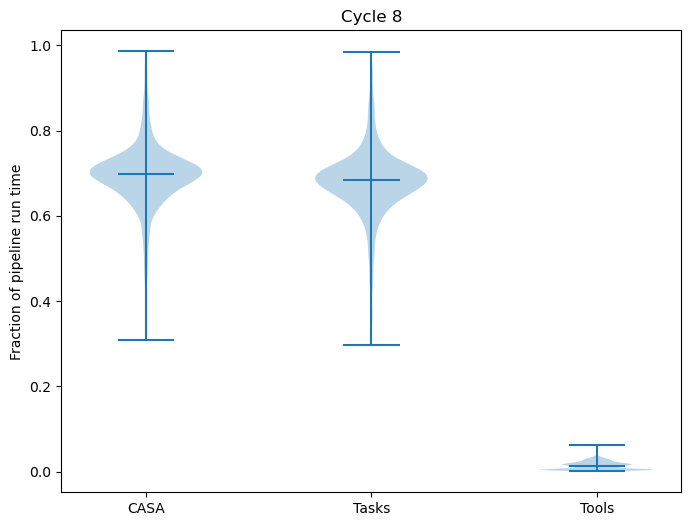

In [33]:
reload(parse_logs)
parse_logs.plot_casa_time(casa_cycle8, plot_title='Cycle 8')

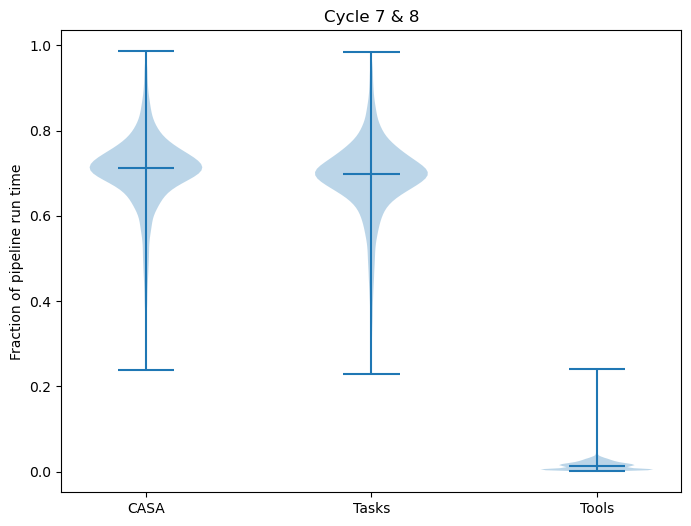

In [34]:
reload(parse_logs)
parse_logs.plot_casa_time(casa_db, plot_title='Cycle 7 & 8',figname='plots_pl/pl_casa_tasks_tools.png')

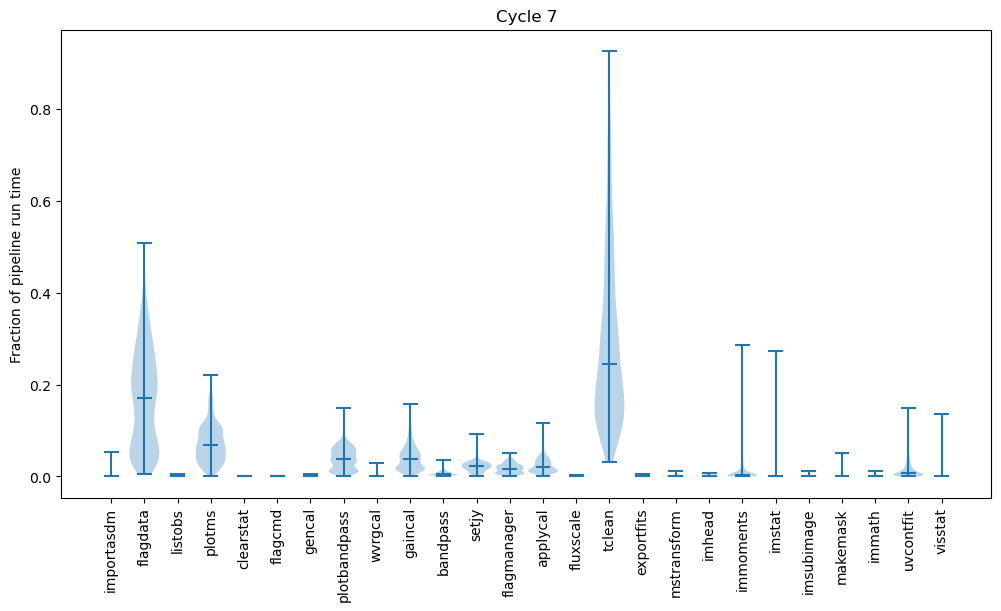

In [150]:
reload(parse_logs)
parse_logs.plot_casa_task_time(casa_cycle7,plot_title='Cycle 7')

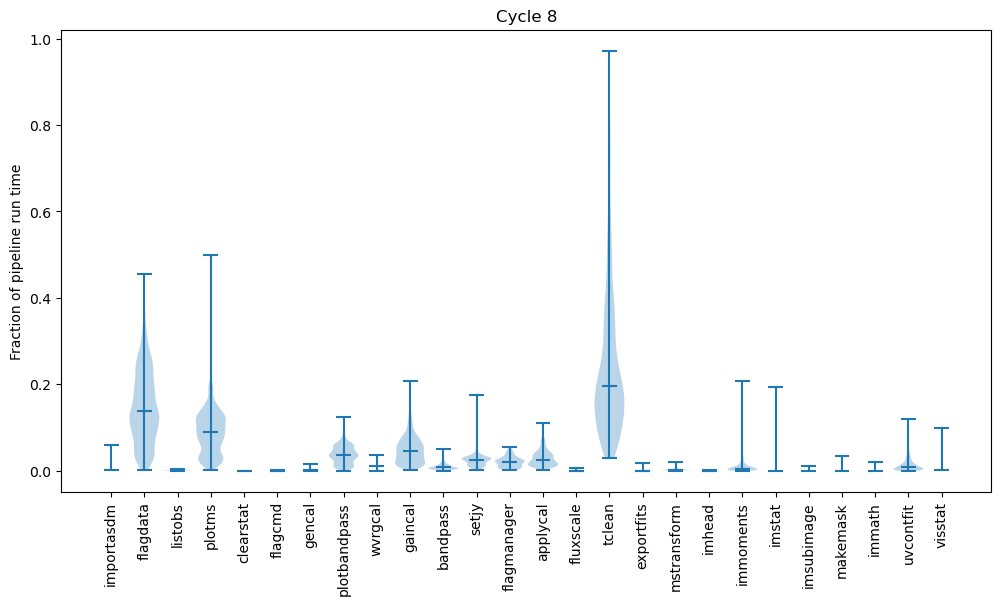

In [36]:
reload(parse_logs)
parse_logs.plot_casa_task_time(casa_cycle8,plot_title='Cycle 8')

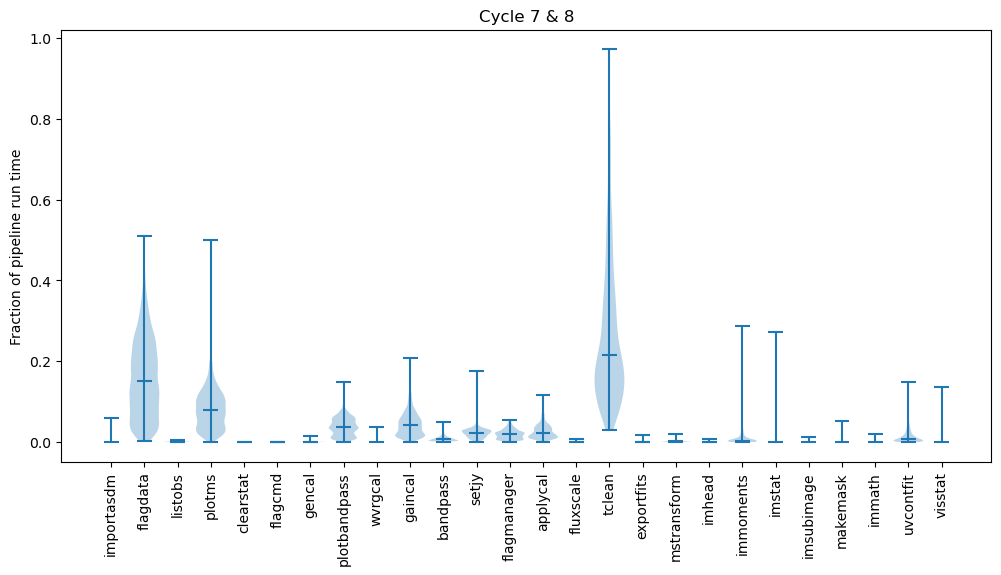

In [153]:
reload(parse_logs)
parse_logs.plot_casa_task_time(casa_db,plot_title='Cycle 7 & 8',
                               figname='plots_pl/casa_task_breakdown_cycle7_cycle8.png')

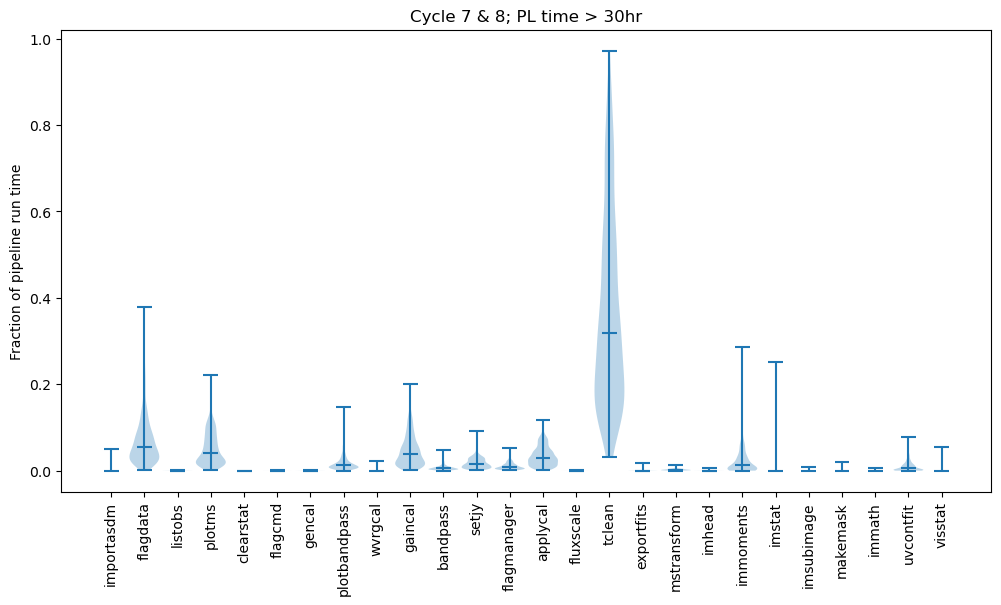

In [38]:
reload(parse_logs)
idx = casa_db['pipetime'] > 60.0 * 60.0 * 30.0 # s -> hr
parse_logs.plot_casa_task_time(casa_db[idx],plot_title='Cycle 7 & 8; PL time > 30hr')

## Looking at predicting pl runtimes

In [39]:
reload(wsu_db)

<module 'wsu_db' from '/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_db.py'>

In [40]:
wsu_db.predict_pl_timings(wsu_all)

In [42]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_time','phase_time','pol_time','check_tim

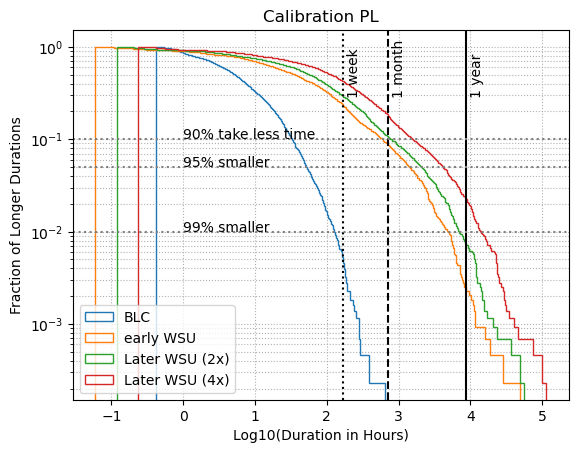

In [166]:
reload(parse_logs)
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_wsu_pl_time(wsu_all[idx],pl_type='caltime',plot_title='Calibration PL',
                            figname='plots_pl/wsu_pl_caltime.png')

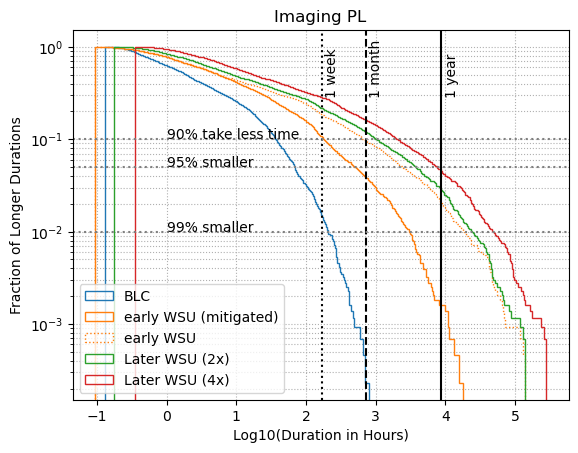

In [185]:
reload(parse_logs)
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_wsu_pl_time(wsu_all[idx],pl_type='imgtime',plot_title='Imaging PL',
                           figname='plots_pl/wsu_pl_imgtime.png')

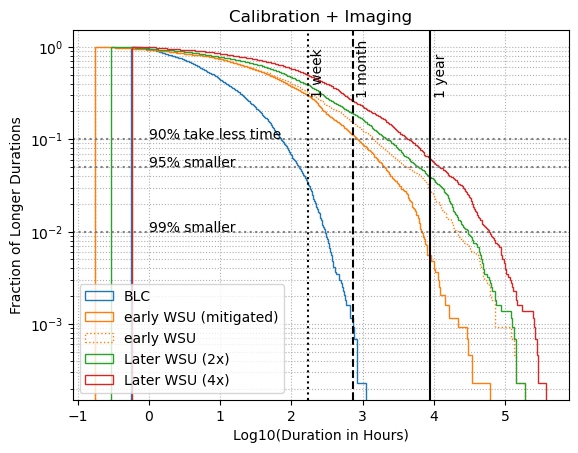

In [186]:
reload(parse_logs)
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_wsu_pl_time(wsu_all[idx],pl_type='totaltime', plot_title='Calibration + Imaging',
                           figname='plots_pl/wsu_pl_totaltime.png')

## Looking at increase in cubesizes

In [96]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_time','phase_time','pol_time','check_tim

In [176]:
prop_cycle = plt.rcParams['axes.prop_cycle']

In [177]:
prop_cycle

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


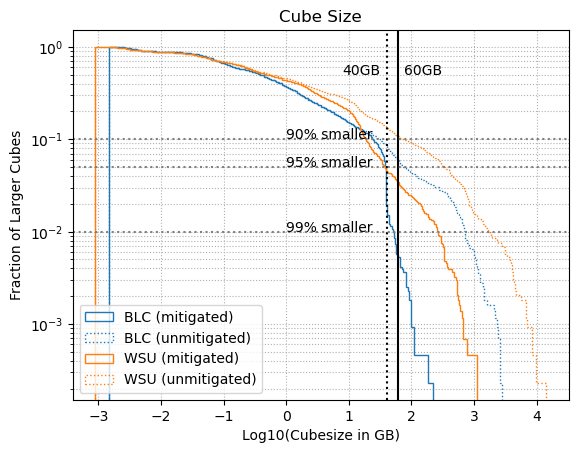

In [183]:
reload(parse_logs)
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_cubesize_comparison(wsu_all[idx],figname='plots_pl/cubesize_distribution.png')

## Looking at increase in productsizes

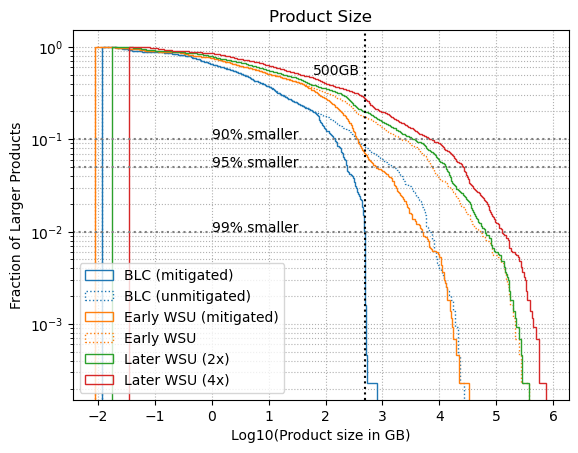

In [184]:
reload(parse_logs)
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_productsize_comparison(wsu_all[idx],figname='plots_pl/productsize_distribution.png')

## Looking at increase in number of visibilities

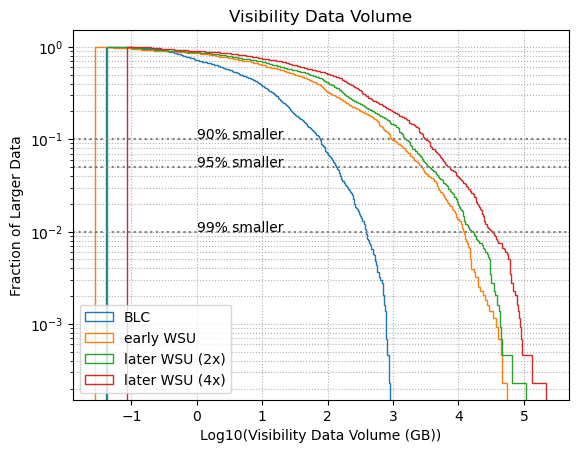

In [172]:
reload(parse_logs)
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_datavol_comparison(wsu_all[idx],figname='plots_pl/datavol_distribution.png')

## Looking at number of EBs per mous

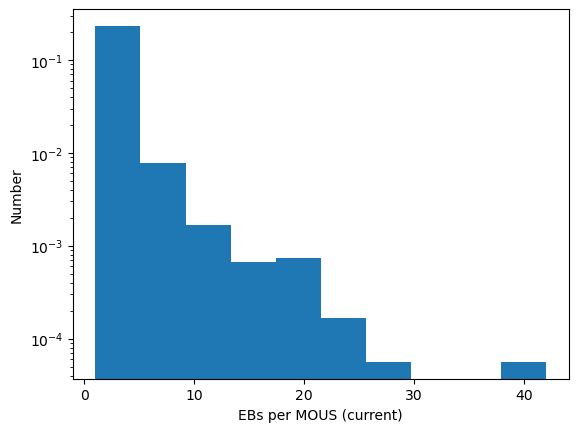

In [207]:
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
plt.hist(wsu_all[idx]['nEB'],log=True,density=True)
plt.xlabel('EBs per MOUS (current)')
plt.ylabel('Number')
plt.savefig('plots_pl/nebs_per_mous.png')

In [195]:
np.nanmean(wsu_all[idx]['nEB'])

1.9811407543698252

In [196]:
np.nanmedian(wsu_all[idx]['nEB'])

1.0

In [237]:
idx = wsu_all['nEB'] > 1.0
np.sum(idx)

1862

In [235]:
idx = (wsu_all['pl_caltime'] > 0)
np.sum(idx)

4718

In [236]:
1862/4718

0.39465875370919884

Text(0, 0.5, 'Pipeline calibration time (hr)')

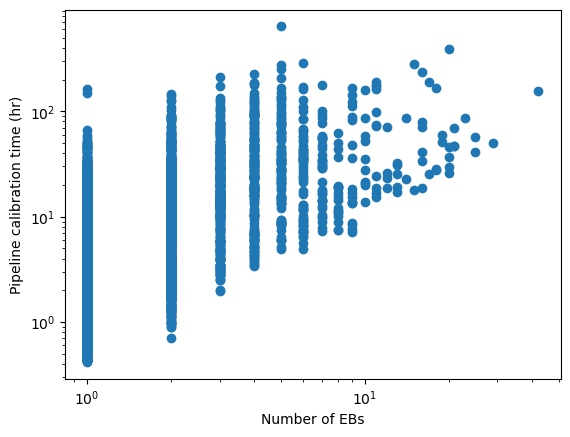

In [221]:
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
plt.loglog(wsu_all[idx]['nEB'],wsu_all[idx]['pl_caltime'],marker='o',linestyle='')
plt.xlabel('Number of EBs')
plt.ylabel('Pipeline calibration time (hr)')

In [225]:
idx = (wsu_all['nEB'] == 1.0) & (wsu_all['pl_caltime'] > 10)
np.sum(idx)

366

In [226]:
idx =  (wsu_all['pl_caltime'] > 10)
np.sum(idx)

1459

In [227]:
1093/1459

0.7491432488005483

In [228]:
366/1469

0.2491490810074881